#### <span style="color:#grey"> __Formation South Green 2022 - Structural Variants Detection by using short and long reads__ </span>

# <span style="color:#006E7F">  <center> __DAY 2 : How to analyze vcf results ?__ </center> </span>

Created by C. Tranchant (DIADE-IRD), J. Orjuela (DIADE-IRD), F. Sabot (DIADE-IRD) and A. Dereeper (PHIM-IRD)

***

# <span style="color: #006E7F">Table of contents</span>
<a class="anchor" id="home"></a>

[I - Get some basic stats from vcf files](#statvcf)

[II - FILTERING VCF](#vcffiltering)

</span>

***



## <span style="color:#006E7F">__I. Get some basic stats from vcf files__ <a class="anchor" id="statvcf"></a></span> 

In this exercise, we are going to work with the whole vcf generated from the 20 clones.

#### Firstly, download the directory that contains the vcf into the subdirectory `work` and decompress it
link : https://itrop.ird.fr/sv-training/VCF_CLONES.tar.gz

In [ ]:
%%bash
cd /home/jovyan/work/
wget https://itrop.ird.fr/sv-training/VCF_CLONES.tar.gz
tar zxvf VCF_CLONES.tar.gz
rm VCF_CLONES.tar.gz

### <span style="color: #4CACBC;">First go into the directory that containsthe  vcf file to analyze  </span> 

* List the content of this directory


In [6]:
cd /home/jovyan/work/VCF_CLONES/

/home/jovyan/work/VCF_CLONES


In [3]:
ls

genome.txt  output.vcf  output.vcf.idx  rawSNP.vcf  rawSNP.vcf.idx


### <span style="color: #4CACBC;">Count the number of variants with `bcftools stat`<a class="anchor" id="bcftools"></a></span> 

* run the bcftools stats on the vcf file and save the result into the file `rice-CHR6.200000.vcf.stat`
* check that the file have been correctly created and display the 35 first lines of this file
* How many samples were used for this SNP analysis ?
* How many SNPs were detected ?

In [4]:
%%bash
bcftools stats output.vcf >  output.vcf.stat

#### Display the first lines of the stat file

In [5]:
%%bash
head -n 35 output.vcf.stat

# This file was produced by bcftools stats (1.10.2+htslib-1.10.2-3) and can be plotted using plot-vcfstats.
# The command line was:	bcftools stats  output.vcf
#
# Definition of sets:
# ID	[2]id	[3]tab-separated file names
ID	0	output.vcf
# SN, Summary numbers:
#   number of records   .. number of data rows in the VCF
#   number of no-ALTs   .. reference-only sites, ALT is either "." or identical to REF
#   number of SNPs      .. number of rows with a SNP
#   number of MNPs      .. number of rows with a MNP, such as CC>TT
#   number of indels    .. number of rows with an indel
#   number of others    .. number of rows with other type, for example a symbolic allele or
#                          a complex substitution, such as ACT>TCGA
#   number of multiallelic sites     .. number of rows with multiple alternate alleles
#   number of multiallelic SNP sites .. number of rows with multiple alternate alleles, all SNPs
# 
#   Note that rows containing multiple types will be counted multiple 

### <span style="color: #4CACBC;">Generating statistics from a VCF to determine how to set filters on it<a class="anchor" id="vcffilters"></a></span> `vcftools`

We will generate more statistics from a VCF using vcftools (LINK MANUAL), a very useful and fast program for handling vcf files 
to easily calculate these statistics in order to better define filters we will apply and to get an idea of how to set such filtering thresholds. 

The main information we will consider are:
* Depth: Usually, we filter SNP with a minimum and maximum depth. We use a minimum depth cutoffs to remove false positive calls and to keep higher quality calls too. 
A maximum cut off allow to remove regions with very, very high read depths such as repetitive regions.
* Quality Genotype quality : With this filter, we should not trust any genotype with a Phred score below 20 which suggests a less than 99% accuracy.
* Minor allele frequency MAF can cause big problems with SNP calls - and also inflate statistical estimates downstream. Ideally you want an idea of the distribution of your 
allelic frequencies but 0.05 to 0.10 is a reasonable cut-off. You should keep in mind however that some analyses, particularly demographic inference can be biased by MAF thresholds.
* Missing data How much missing data are you willing to tolerate? It will depend on the study but typically any site with >25% missing data should be dropped.
* biallelic, heterozygosity...

In this training, we will just display quality and depth distribution... but you should do on each value filterd.

#### <span style="color: #4CACBC;">Mean depth per individual and per site<a class="anchor" id="depthvcf"></a></span> `--depth, --site-mean-depth`

* run vcftool with the correct options
* check that the files have been created and display the first lines

In [7]:
%%bash
vcftools --vcf output.vcf --depth --out depthi
vcftools --vcf output.vcf --site-mean-depth --out depths


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf output.vcf
	--depth
	--out depthi

After filtering, kept 20 out of 20 Individuals
Outputting Mean Depth by Individual
After filtering, kept 568240 out of a possible 568240 Sites
Run Time = 4.00 seconds

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf output.vcf
	--out depths
	--site-mean-depth

After filtering, kept 20 out of 20 Individuals
Outputting Depth for Each Site
After filtering, kept 568240 out of a possible 568240 Sites
Run Time = 7.00 seconds


#### Display the first lines of the files just created by vcftools

In [8]:
%%bash
ls -lrt
head *depth*

total 1277076
-rw-r----- 1 jovyan users    151798 Jun 17 09:46 output.vcf.idx
-rw-r----- 1 jovyan users 792485101 Jun 17 09:49 rawSNP.vcf
-rw-r----- 1 jovyan users        19 Jun 17 09:49 genome.txt
-rw-r----- 1 jovyan users    238921 Jun 17 09:49 rawSNP.vcf.idx
-rw-r----- 1 jovyan users 497636158 Jun 17 09:51 output.vcf
-rw-r--r-- 1 jovyan users     40211 Jun 20 20:35 output.vcf.stat
-rw-r--r-- 1 jovyan users       473 Jun 20 20:39 depthi.idepth
-rw-r--r-- 1 jovyan users  17146658 Jun 20 20:39 depths.ldepth.mean
==> depthi.idepth <==
INDV	N_SITES	MEAN_DEPTH
Clone1	568240	36.0589
Clone10	568236	30.6221
Clone11	568239	31.2727
Clone12	568230	26.0382
Clone13	568240	32.018
Clone14	568225	31.6534
Clone15	568233	31.1039
Clone16	568227	31.5335
Clone17	568235	32.4415

==> depths.ldepth.mean <==
CHROM	POS	MEAN_DEPTH	VAR_DEPTH
Reference	30	4.75	4.30263
Reference	36	5.7	5.27368
Reference	38	5.9	5.67368
Reference	39	5.95	5.62895
Reference	42	6.6	4.56842
Reference	45	6.95	3.94474
Reference	54	8.05	3

#### <span style="color: #4CACBC;">Extracting quality per site<a class="anchor" id="depthvcf"></a></span>  `--site-quality`

* run vcftool with the correct options
* check that the files have been created and display the first lines

In [9]:
%%bash
vcftools --vcf output.vcf  --site-quality --out qual


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf output.vcf
	--out qual
	--site-quality

After filtering, kept 20 out of 20 Individuals
Outputting Quality for Each Site
After filtering, kept 568240 out of a possible 568240 Sites
Run Time = 4.00 seconds


#### Display the first lines of the file just created by vcftools

In [10]:
%%bash
ls -lrt
head *qual

total 1290848
-rw-r----- 1 jovyan users    151798 Jun 17 09:46 output.vcf.idx
-rw-r----- 1 jovyan users 792485101 Jun 17 09:49 rawSNP.vcf
-rw-r----- 1 jovyan users        19 Jun 17 09:49 genome.txt
-rw-r----- 1 jovyan users    238921 Jun 17 09:49 rawSNP.vcf.idx
-rw-r----- 1 jovyan users 497636158 Jun 17 09:51 output.vcf
-rw-r--r-- 1 jovyan users     40211 Jun 20 20:35 output.vcf.stat
-rw-r--r-- 1 jovyan users       473 Jun 20 20:39 depthi.idepth
-rw-r--r-- 1 jovyan users  17146658 Jun 20 20:39 depths.ldepth.mean
-rw-r--r-- 1 jovyan users  14102265 Jun 20 20:39 qual.lqual
CHROM	POS	QUAL
Reference	30	66.89
Reference	36	200.62
Reference	38	114.16
Reference	39	91.7
Reference	42	318.58
Reference	45	113.02
Reference	54	333.4
Reference	58	1001.62
Reference	61	422.5



__Calculate allele frequency__

* --freq2 : outputs the frequencies without information about the alleles
* --freq would return their identity. 
* --max-alleles 2 to exclude sites that have more than two alleles.

In [11]:
%%bash
vcftools --vcf output.vcf --freq --out AF --max-alleles 2
vcftools --vcf output.vcf --freq2 --out AF2 --max-alleles 2
ls -lrt
head *.frq


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf output.vcf
	--max-alleles 2
	--freq
	--out AF

After filtering, kept 20 out of 20 Individuals
Outputting Frequency Statistics...
After filtering, kept 401218 out of a possible 568240 Sites
Run Time = 5.00 seconds

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf output.vcf
	--max-alleles 2
	--freq2
	--out AF2

After filtering, kept 20 out of 20 Individuals
Outputting Frequency Statistics...
After filtering, kept 401218 out of a possible 568240 Sites
Run Time = 4.00 seconds


total 1323152
-rw-r----- 1 jovyan users    151798 Jun 17 09:46 output.vcf.idx
-rw-r----- 1 jovyan users 792485101 Jun 17 09:49 rawSNP.vcf
-rw-r----- 1 jovyan users        19 Jun 17 09:49 genome.txt
-rw-r----- 1 jovyan users    238921 Jun 17 09:49 rawSNP.vcf.idx
-rw-r----- 1 jovyan users 497636158 Jun 17 09:51 output.vcf
-rw-r--r-- 1 jovyan users     40211 Jun 20 20:35 output.vcf.stat
-rw-r--r-- 1 jovyan users       473 Jun 20 20:39 depthi.idepth
-rw-r--r-- 1 jovyan users  17146658 Jun 20 20:39 depths.ldepth.mean
-rw-r--r-- 1 jovyan users  14102265 Jun 20 20:39 qual.lqual
-rw-r--r-- 1 jovyan users  17346823 Jun 20 20:40 AF.frq
-rw-r--r-- 1 jovyan users  15727473 Jun 20 20:40 AF2.frq
==> AF2.frq <==
CHROM	POS	N_ALLELES	N_CHR	{FREQ}
Reference	30	2	36	0.944444	0.0555556
Reference	36	2	36	0.944444	0.0555556
Reference	38	2	36	0.944444	0.0555556
Reference	39	2	38	0.947368	0.0526316
Reference	42	2	38	0.947368	0.0526316
Reference	45	2	40	0.95	0.05
Reference	54	2	38	0.947368	0.0526316
Reference	

### <span style="color: #4CACBC;">Generating density plot QUAL & DEPTH<a class="anchor" id="vcfplot"></a></span> 

#### <span style="color: #4CACBC;">Plotting quality per site<a class="anchor" id="qualplot"></a></span> 

In [13]:
import os
import pandas as pd

qual_file="qual.lqual"
df_qual = pd.read_csv(qual_file, index_col=False, sep="\t")
print(df_qual)
df_qual['QUAL'].describe()

            CHROM     POS    QUAL
0       Reference      30   66.89
1       Reference      36  200.62
2       Reference      38  114.16
3       Reference      39   91.70
4       Reference      42  318.58
...           ...     ...     ...
568235  Reference  999983  166.58
568236  Reference  999985   84.98
568237  Reference  999987  135.96
568238  Reference  999990   97.25
568239  Reference  999993  142.96

[568240 rows x 3 columns]


count    568240.000000
mean       2581.014661
std        1376.167200
min          30.030000
25%        1639.830000
50%        1997.840000
75%        3434.790000
max       14705.700000
Name: QUAL, dtype: float64

<AxesSubplot:xlabel='QUAL', ylabel='Density'>

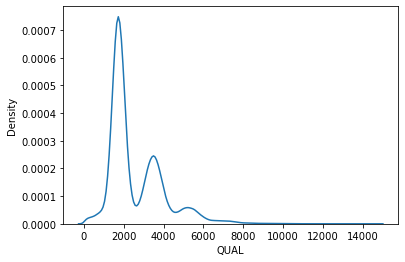

In [14]:
# Plot with seaborn
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(x="QUAL", data=df_qual)

Text(0, 0.5, 'PUT A Y-AXIS LABEL')

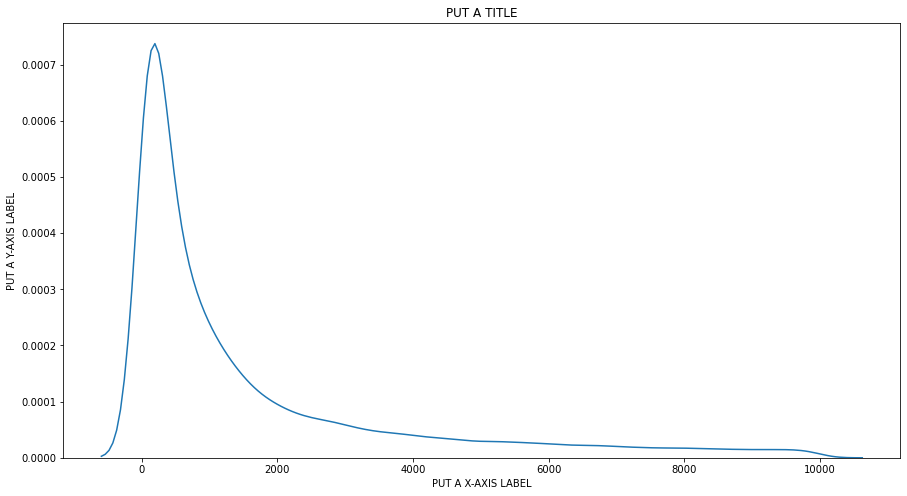

In [122]:
# Plot with seaborn
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize = (15,8))
ax=sns.kdeplot(x="QUAL", data=df_qual[df_qual.QUAL<10000])
ax.set_title("PUT A TITLE")
ax.set_xlabel("PUT A X-AXIS LABEL")
ax.set_ylabel("PUT A Y-AXIS LABEL")

#### <span style="color: #4CACBC;">Plotting Mean depth per site<a class="anchor" id="depthplot"></a></span> 

In [15]:
depth_file="depths.ldepth.mean"
df_depth = pd.read_csv(depth_file, index_col=False, sep="\t")
print(df_depth)
df_depth.describe()

            CHROM     POS  MEAN_DEPTH  VAR_DEPTH
0       Reference      30        4.75   4.302630
1       Reference      36        5.70   5.273680
2       Reference      38        5.90   5.673680
3       Reference      39        5.95   5.628950
4       Reference      42        6.60   4.568420
...           ...     ...         ...        ...
568235  Reference  999983        1.85   3.923680
568236  Reference  999985        1.35   3.713160
568237  Reference  999987        0.35   0.765789
568238  Reference  999990        0.20   0.378947
568239  Reference  999993        0.15   0.450000

[568240 rows x 4 columns]


,POS,MEAN_DEPTH,VAR_DEPTH
count,568240.000000,568240.000000,568240.000000
mean,508603.855019,33.484068,183.429022
std,297048.514479,4.305675,128.256867
min,30.000000,0.100000,0.094737
25%,227415.750000,31.700000,108.095000
50%,534353.000000,33.900000,170.029000
75%,765228.250000,36.050000,227.945000
max,999993.000000,49.050000,2491.250000


Text(0, 0.5, 'PUT A Y-AXIS LABEL')

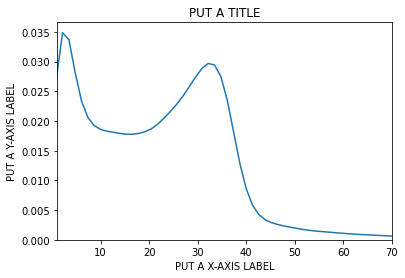

In [125]:
# Plot with seaborn
import matplotlib.pyplot as plt
import seaborn as sns

ax=sns.kdeplot(x="MEAN_DEPTH", data=df_depth)
ax.set_xlim(1, 70)
ax.set_title("PUT A TITLE")
ax.set_xlabel("PUT A X-AXIS LABEL")
ax.set_ylabel("PUT A Y-AXIS LABEL")

Text(0, 0.5, 'PUT A Y-AXIS LABEL')

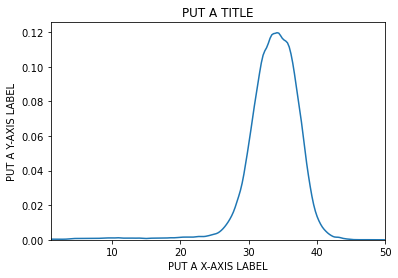

In [17]:
# Plot with seaborn
import matplotlib.pyplot as plt
import seaborn as sns

ax=sns.kdeplot(x="MEAN_DEPTH", data=df_depth[df_depth.MEAN_DEPTH<50])
ax.set_xlim(1, 50)
ax.set_title("PUT A TITLE")
ax.set_xlabel("PUT A X-AXIS LABEL")
ax.set_ylabel("PUT A Y-AXIS LABEL")

### <span style="color: #4CACBC;">III - FILTERING VCF <a class="anchor" id="vcffiltering"></a></span> 


#### Which filters ?

Here, we will apply on the vcf the following filters :

* QUAL > 300
* DP > 30 and DP < 400
* Less than 3 SNPs into a window of 10pb

The threshodl of each filter depends on the SNP analysis (sample number, sequencing depth).

In a second step, according the following analysys (eg: population genomics), usually, we will apply other filters such as :
* removing missing data
* keeping only biallellic
* heterozygosity
    
#### Select only the SNPs (and remove the INDELs) - `gatk variantFiltration`
* Filter vcf to keep only SNPs
* Check that the new vcf has been created
* Get the number of polymorphisms in the new vcf file 

In [18]:
%%bash
gatk SelectVariants --java-options "-Xmx8G -Xms8G" -R /home/jovyan/work/SV_DATA/REF/reference.fasta -V output.vcf -select-type SNP -O output.onlySNP.vcf

Using GATK jar /opt/conda/share/gatk4-4.2.6.1-1/gatk-package-4.2.6.1-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -Xmx8G -Xms8G -jar /opt/conda/share/gatk4-4.2.6.1-1/gatk-package-4.2.6.1-local.jar SelectVariants -R /home/jovyan/work/SV_DATA/REF/reference.fasta -V output.vcf -select-type SNP -O output.onlySNP.vcf
20:46:06.685 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/opt/conda/share/gatk4-4.2.6.1-1/gatk-package-4.2.6.1-local.jar!/com/intel/gkl/native/libgkl_compression.so
20:46:07.263 INFO  SelectVariants - ------------------------------------------------------------
20:46:07.264 INFO  SelectVariants - The Genome Analysis Toolkit (GATK) v4.2.6.1
20:46:07.264 INFO  SelectVariants - For support and documentation go to https://software.broadinstitute.org/gatk/
20:46:11.547 INFO  SelectVariants - Initializing engine
20:46:12

#### Get the SNP count of this new vcf file

In [19]:
%%bash
ls -lrth
bcftools stats output.onlySNP.vcf | head -n35

total 1.8G
-rw-r----- 1 jovyan users 149K Jun 17 09:46 output.vcf.idx
-rw-r----- 1 jovyan users 756M Jun 17 09:49 rawSNP.vcf
-rw-r----- 1 jovyan users   19 Jun 17 09:49 genome.txt
-rw-r----- 1 jovyan users 234K Jun 17 09:49 rawSNP.vcf.idx
-rw-r----- 1 jovyan users 475M Jun 17 09:51 output.vcf
-rw-r--r-- 1 jovyan users  40K Jun 20 20:35 output.vcf.stat
-rw-r--r-- 1 jovyan users  473 Jun 20 20:39 depthi.idepth
-rw-r--r-- 1 jovyan users  17M Jun 20 20:39 depths.ldepth.mean
-rw-r--r-- 1 jovyan users  14M Jun 20 20:39 qual.lqual
-rw-r--r-- 1 jovyan users  17M Jun 20 20:40 AF.frq
-rw-r--r-- 1 jovyan users  15M Jun 20 20:40 AF2.frq
-rw-r--r-- 1 jovyan users 467M Jun 20 20:46 output.onlySNP.vcf
-rw-r--r-- 1 jovyan users 147K Jun 20 20:46 output.onlySNP.vcf.idx
# This file was produced by bcftools stats (1.10.2+htslib-1.10.2-3) and can be plotted using plot-vcfstats.
# The command line was:	bcftools stats  output.onlySNP.vcf
#
# Definition of sets:
# ID	[2]id	[3]tab-separated file names
ID	0	ou

#### Compress the vcf and generate the index of the compressed vcf - `tabix -p vcf vcf_file`

In [8]:
%%bash
bgzip output.onlySNP.vcf
ls -lrth

[bgzip] No such file or directory: output.onlySNP.vcf


total 1.4G
-rw-r----- 1 jovyan users 149K Jun 17 09:46 output.vcf.idx
-rw-r----- 1 jovyan users 756M Jun 17 09:49 rawSNP.vcf
-rw-r----- 1 jovyan users   19 Jun 17 09:49 genome.txt
-rw-r----- 1 jovyan users 234K Jun 17 09:49 rawSNP.vcf.idx
-rw-r----- 1 jovyan users 475M Jun 17 09:51 output.vcf
-rw-r--r-- 1 jovyan users  40K Jun 20 20:35 output.vcf.stat
-rw-r--r-- 1 jovyan users  473 Jun 20 20:39 depthi.idepth
-rw-r--r-- 1 jovyan users  17M Jun 20 20:39 depths.ldepth.mean
-rw-r--r-- 1 jovyan users  14M Jun 20 20:39 qual.lqual
-rw-r--r-- 1 jovyan users  17M Jun 20 20:40 AF.frq
-rw-r--r-- 1 jovyan users  15M Jun 20 20:40 AF2.frq
-rw-r--r-- 1 jovyan users 147K Jun 20 20:46 output.onlySNP.vcf.idx
-rw-r--r-- 1 jovyan users  50M Jun 20 20:46 output.onlySNP.vcf.gz
-rw-r--r-- 1 jovyan users  830 Jun 20 20:47 output.onlySNP.vcf.gz.tbi
-rw-r--r-- 1 jovyan users  52M Jun 20 21:23 output.filteredSNP.vcf


In [9]:
%%bash
tabix -f -p vcf output.onlySNP.vcf.gz
ls -lrth

total 1.4G
-rw-r----- 1 jovyan users 149K Jun 17 09:46 output.vcf.idx
-rw-r----- 1 jovyan users 756M Jun 17 09:49 rawSNP.vcf
-rw-r----- 1 jovyan users   19 Jun 17 09:49 genome.txt
-rw-r----- 1 jovyan users 234K Jun 17 09:49 rawSNP.vcf.idx
-rw-r----- 1 jovyan users 475M Jun 17 09:51 output.vcf
-rw-r--r-- 1 jovyan users  40K Jun 20 20:35 output.vcf.stat
-rw-r--r-- 1 jovyan users  473 Jun 20 20:39 depthi.idepth
-rw-r--r-- 1 jovyan users  17M Jun 20 20:39 depths.ldepth.mean
-rw-r--r-- 1 jovyan users  14M Jun 20 20:39 qual.lqual
-rw-r--r-- 1 jovyan users  17M Jun 20 20:40 AF.frq
-rw-r--r-- 1 jovyan users  15M Jun 20 20:40 AF2.frq
-rw-r--r-- 1 jovyan users 147K Jun 20 20:46 output.onlySNP.vcf.idx
-rw-r--r-- 1 jovyan users  50M Jun 20 20:46 output.onlySNP.vcf.gz
-rw-r--r-- 1 jovyan users  53M Jun 20 21:23 output.filteredSNP.vcf
-rw-r--r-- 1 jovyan users  830 Jun 20 21:23 output.onlySNP.vcf.gz.tbi


#### Applying filters on QUAL, DEPTH and CLUSTER SNPsSelect only the SNPs (and remove the INDELs) - `gatk variantFiltration`

Be careful, it miss one filter in the following command

In [ ]:
%%bash
gatk VariantFiltration --java-options "-Xmx12G -Xms12G" -R /home/jovyan/work/SV_DATA/REF/reference.fasta  -V output.onlySNP.vcf.gz --filter-expression "QUAL<300" --filter-name "LOW_QUAL" --filter-expression "DP<30" --filter-name "LOW_DP"    --filter-expression "DP>40" --filter-name "HIGH_DP"  --cluster-size 3 --cluster-window-size 10  -O output.filteredSNP.vcf

Using GATK jar /opt/conda/share/gatk4-4.2.6.1-1/gatk-package-4.2.6.1-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -Xmx12G -Xms12G -jar /opt/conda/share/gatk4-4.2.6.1-1/gatk-package-4.2.6.1-local.jar VariantFiltration -R /home/jovyan/work/SV_DATA/REF/reference.fasta -V output.onlySNP.vcf.gz --filter-expression QUAL<300 --filter-name LOW_QUAL --filter-expression DP<30 --filter-name LOW_DP --filter-expression DP>40 --filter-name HIGH_DP --cluster-size 3 --cluster-window-size 10 -O output.filteredSNP.vcf
21:23:38.386 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/opt/conda/share/gatk4-4.2.6.1-1/gatk-package-4.2.6.1-local.jar!/com/intel/gkl/native/libgkl_compression.so
21:23:38.579 INFO  VariantFiltration - ------------------------------------------------------------
21:23:38.579 INFO  VariantFiltration - The Genome Analysis Tool

In [ ]:
ls -lrtht

In [2]:
%%bash
bgzip output.filteredSNP.vcf
tabix -p vcf output.filteredSNP.vcf.gz
ls -lrtht

[bgzip] No such file or directory: output.filteredSNP.vcf
tbx_index_build failed: output.filteredSNP.vcf.gz


total 876K
-rw-r--r-- 1 jovyan users 1.3K Jun 20 14:44 README.md
-rw-r--r-- 1 jovyan users  14K Jun 20 14:44 Day4_SV_genome.ipynb
-rw-r--r-- 1 jovyan users  12K Jun 20 14:44 Day3b_Variants_structuraux_CORR.ipynb
-rw-r--r-- 1 jovyan users  19K Jun 20 17:03 Day1_Mapping_Practice_EMPTY.ipynb
-rw-r--r-- 1 jovyan users  61K Jun 20 17:04 Day1_Mapping_Practice_CORR.ipynb
-rw-r--r-- 1 jovyan users  13K Jun 20 17:35 Day2b_Appel_variants_SNP_EMPTY.ipynb
-rw-r--r-- 1 jovyan users  72K Jun 20 20:21 Day2a_Mapping_analysis_CORR.ipynb
-rw-r--r-- 1 jovyan users  11K Jun 20 20:23 Day2a_Mapping_analysis-EMPTY.ipynb
-rw-r--r-- 1 jovyan users 302K Jun 20 21:02 Day2b_Appel_variants_SNP_CORR.ipynb
-rw-r--r-- 1 jovyan users  21K Jun 20 21:19 Day2c_SNP_analysis_EMPTY.ipynb
-rw-r--r-- 1 jovyan users 329K Jun 20 21:20 Day2c_SNP_analysis_CORR.ipynb


In [ ]:
%%bash
bcftools stats output.filteredSNP.vcf.gz | head -n 35

#### _Commands to apply other filters_

##### remove missing data if more than 5% of missing data at a site (12 samples over 228 samples) `vcftools`

`vcftools --vcf input.vcf --max-missing-count 12 --remove-filtered-all --recode --recode-INFO-all  --out ouput.onlySNP.12na`

##### keep SNPs with only 90% homzygous (222 samples)

`cat input.vcf | java -jar SnpSift.jar filter " (countHom( )> 222) " > output.onlySNP.12na.recode.222homoz.vcf`

##### keep only biallelic sites
`vcftools --vcf input.vcf --min-alleles 2 --max-alleles 2 --remove-filtered-all --recode --recode-INFO-all --out output.onlySNP.filteredPASS.na.225.Homoz.biallelic`

### <span style="color: #4CACBC;">IV - VCF ANNOTATION <a class="anchor" id="vcffiltering"></a></span> 

java -jar snpEff.jar -v -o statschr6.onlySNP.html rice6.1 input.vcf > output.snpeff.vcf

## <span style="color:#006E7F">V - Compute the SNP density along the chromosomes<a class="anchor" id="density"></span>  

In [ ]:
echo -e "Reference\t1000000\n" > genome.txt
bedtools genomecov -bga -split -i output.vcf -g genome.txt > density.csv

In [ ]:
head density.csv